In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# I have copied this data straight from 
# https://github.com/asgeirbirkis/chebfun/blob/master/scribble.m
__letters = {
    "A": [0, .4+1j, .8, .6+.5j, .2+.5j],
    "B": [0, 1j, .8+.9j, .8+.6j, .5j, .8+.4j, .8+.1j, 0],
    "C": [.8+1j, .8j, .2j, .8],
    "D": [0, .8+.1j, .8+.9j, 1j, 0],
    "E": [.8+1j, 1j, .5j, .5j+.7, .5j, 0, .8],
    "F": [.8+1j, 1j, .5j, .5j+.7, .5j, 0],
    "G": [.8+1j, .8j, .2j, .6, .6+.5j, .4+.5j, .8+.5j],
    "H": [0, 1j, .5j, .5j+.8, .8+1j, .8],
    "I": [0, .8, .4, .4+1j, 1j, .8+1j],
    "J": [0, .4, .4+1j, 1j, .8+1j],
    "K": [0, 1j, .5j, .8+1j, .5j, .8],
    "L": [1j, 0, .8],
    "M": [0, .1+1j, .4, .7+1j, .8],
    "N": [0, 1j, .8, .8+1j],
    "O": [0, 1j, .8+1j, .8, 0],
    "Q": [0, 1j, .8+1j, .8, .6+.2j, .9-.1j, .8, 0],
    "P": [0, 1j, .8+1j, .8+.5j, .5j],
    "R": [0, 1j, .8+1j, .8+.6j, .5j, .8],
    "S": [.8+1j, .9j, .6j, .8+.4j, .8+.1j, 0],
    "T": [.4, .4+1j, 1j, .8+1j],
    "U": [1j, .1, .7, .8+1j],
    "V": [1j, .4, .8+1j],
    "W": [1j, .2, .4+1j, .6, .8+1j],
    "X": [1j, .8, .4+.5j, .8+1j, 0],
    "Y": [1j, .4+.5j, .8+1j, .4+.5j, .4],
    "Z": [1j, .8+1j, 0, .8], 
    " ": []
}

def letter(x):
    return np.array(__letters[x.upper()])

def __segment(points, n=100):
    """
    Each letter is a represented by a bunch of points a,b,c,d...
    There are straight segments between two adjacent points
    We represent each such segment as a collection of n auxilliary points
    """
    for (a,b) in zip(points[:-1], points[1:]):
        yield np.linspace(a.real, b.real, n) +1j*np.linspace(a.imag, b.imag, n)   
        
def scribble(axes, text, f=lambda x: x, **kwargs):
    for n, l in enumerate(text):
        # move a letter into the complex plane
        points = letter(l) + n

        # move the points to the unit-square
        points = 2 * points / len(text) - 1

        # each segment is a straight line of n points
        for z in __segment(points, n=100):
            # plot the name in the complex plane
            axes.plot(f(z).real, f(z).imag, **kwargs)
            

In [16]:
def wedding(word, f=lambda x: x, title="Lydia & Thomas, August 17, Rhodes House"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 11.69), subplot_kw={"aspect": "equal"})
    
    scribble(axes[1], text=word, f=f, title=title, linewidth=2, color="blue")
               
    axes[0].set_axis_off()   
    axes[0].text(0.5, 0.5, '{name}'.format(name=word), horizontalalignment='right', rotation=180) 
    
    fig.savefig("data/{name}.pdf".format(name=word))

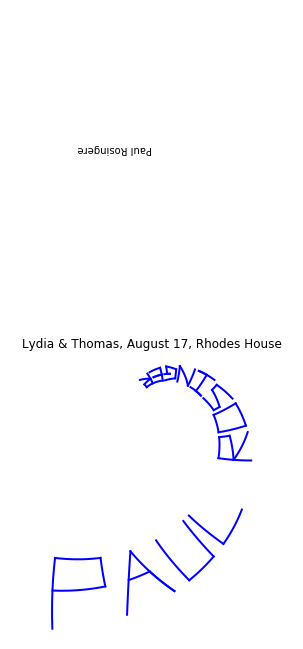

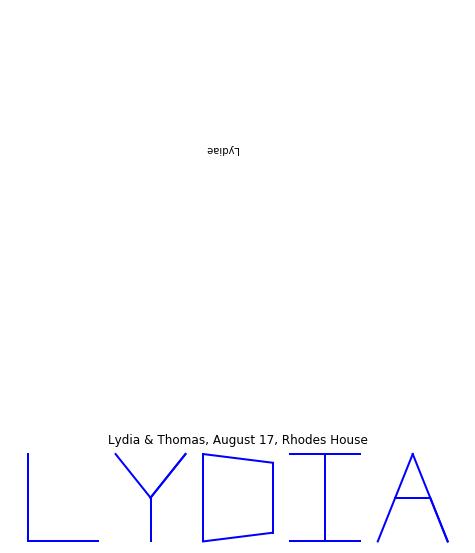

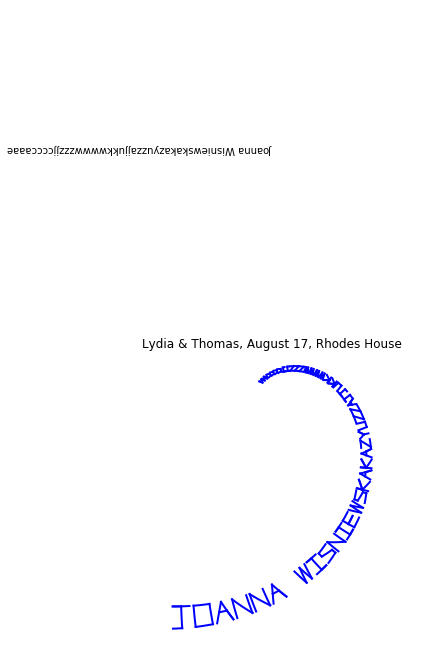

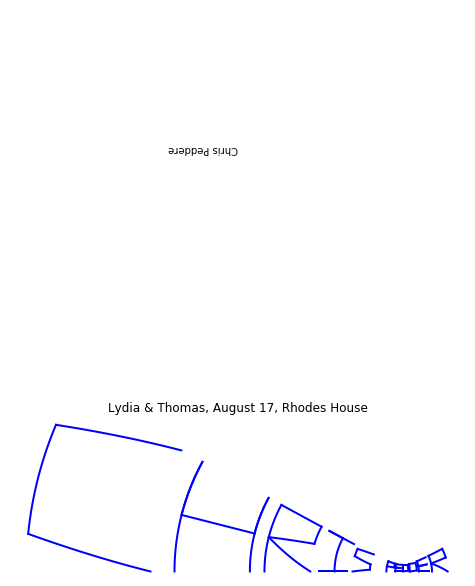

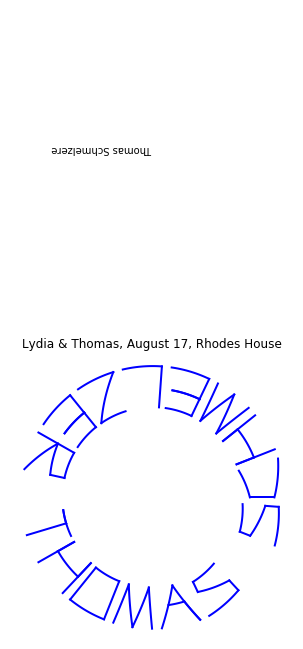

In [17]:
wedding("Paul Rosinger", f=lambda z: np.exp((-1+2j)*z))
wedding("Lydia")
wedding("Joanna Wisniewskakazyuzzajjukkwwwwzzzjjccccaaa", f=lambda z: np.exp((-1+2j)*z))
wedding("Chris Pedder", f=lambda z: np.sinh(3*z-1))
wedding("Thomas Schmelzer", f=lambda z: np.exp(z*3j))